# Tugas Pemrograman Kecerdasan Artifisial


**Topik** : [Klasifikasi] pada [User Knowledge Modeling] menggunakan k-Nearest Neighbours.

**Anggota Kelompok**:
- Muhammad Iqbal Rizaldy (1301220343)
- Adrian Prakoso Harianto (1301220278)
- Iqal Mahendra Laksono (1301223243)

# A. Pendahuluan dan Paparan Data

## Dataset

H. Kahraman, I. Colak, and S. Sagiroglu. "User Knowledge Modeling," UCI Machine Learning Repository, 2009. [Online]. Available: https://doi.org/10.24432/C5231X.

## Permasalahan yang Dihadapi

Dataset digunakan dalam perancangan User Modelling System (UMS) untuk aplikasi pembelajaran daring adaptif berbasis web. Pada konteks ini UMS merupakan rancangan model dengan mekanisme personalisasi pengguna yang adaptif sehingga akses konten menjadi lebih mudah dan cepat serta dapat meningkatkan efektivitas dan efisiensi aplikasi. Dengan UMS yang baik, aplikasi dapat menyediakan materi pengetahuan yang cukup atau sesuai untuk siswa/pengguna khususnya dalam lingkungan pembelajaran daring.

Dalam upaya membangun UMS, pembuat dataset ini menganalisis perilaku atau data siswa yang diperoleh melalui interaksi mereka dengan lingkungan web. Perolehan data tersebut mencakup aktivitas pendidikan siswa, seperti halaman yang dikunjungi, waktu yang dihabiskan di halaman konsep/tujuan, kinerja ujian pada halaman pelajaran, dan repetisi. Dari analisis tersebut akan menghasilkan data dinamis sebagai representasi tingkat atau status pengetahuan siswa. Data - data tersebut merupakan data yang akan digunakan dengan tujuan menciptakan deskripsi konsisten dari model siswa. Dengan demikian, dataset ini dipersiapkan dan diatur sedemikian yang terdiri dari variabel-variabel independen (aktivitas pendidikan siswa pada aplikasi) dan variabel dependen (status pengetahuan siswa).


Di dalam dataset ini, variabel independen atau fitur-fitur yang tersedia dan variabel dependen atau data target dideskripsikan sebagai berikut:
  - STG (The degree of study time for goal object materials):

   Tingkat waktu belajar yang dihabiskan oleh pengguna untuk mempelajari materi yang menjadi tujuan (goal).

  - SCG (The degree of repetition number of user for goal object materials):

  Tingkat jumlah pengulangan yang dilakukan pengguna saat mempelajari materi tujuan (goal).

  - STR (The degree of study time of user for related objects with goal object):

  Tingkat waktu belajar yang dihabiskan pengguna untuk mempelajari materi yang berkaitan dengan materi tujuan.

  - LPR (The exam performance of user for related objects with goal object):

  Performa pengguna pada ujian terkait materi pendukung.

  - PEG (The exam performance of user for goal objects):

  Performa pengguna pada ujian yang secara langsung menguji materi tujuan.

  
  - UNS (The knowledge level of user):

  Tingkat pengetahuan pengguna secara keseluruhan berdasarkan kombinasi dari waktu belajar, pengulangan, dan performa. Ini merupakan variabel dependen.


Berdasarkan dataset yang diperoleh, kami akan merancang model machine learning untuk klasifikasi status pengetahuan siswa menggunakan pendekatan k-Nearest Neighbors (k-NN). k-NN adalah algoritma pembelajaran berbasis instance yang mengklasifikasikan data baru berdasarkan kesamaan dengan data yang ada. k-NN memiliki kelebihan diantaranya:
- Pendekatan konseptual yang sederhana
- Proses pelatihan yang tidak kompleks (hanya terdiri dari menyimpan data pelatihan yang didapatkan)
- Adaptif terhadap perubahan data

Dengan kelebihan-kelebihan tersebut, k-NN menjadi metode yang sesuai dalam perancangan UMS untuk aplikasi pembelajaran daring adaptif berbasis web. Untuk mengevaluasi model, kami menggunakan beberapa metriks evaluasi yang mencakup akurasi, presisi, recall dan F1-score. Dengan metriks ini, kita akan mengetahui seberapa baik model dalam memprediksi kelas data uji.






## Paparan dan Statistik Dataset

### Import Library

In [1]:
# Mengabaikan warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [3]:
df = pd.read_csv("data.csv", sep=";", header=0)

# Menghapus white space pada kolom
df.columns = df.columns.str.strip()

# Mengubah pemisah desimal menjadi titik dan tipe data menjadi float
for label in df.columns[:-1]:
    df[label] = df[label].str.replace(",",".").astype(float)


### Menampilkan Dataset

In [4]:
display(df)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,High
399,0.85,0.82,0.66,0.83,0.83,High
400,0.56,0.60,0.77,0.13,0.32,Low
401,0.66,0.68,0.81,0.57,0.57,Middle


### Menampilkan Deskripsi Statistik dari Dataset

In [5]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


### Menampilkan Korelasi Dataset

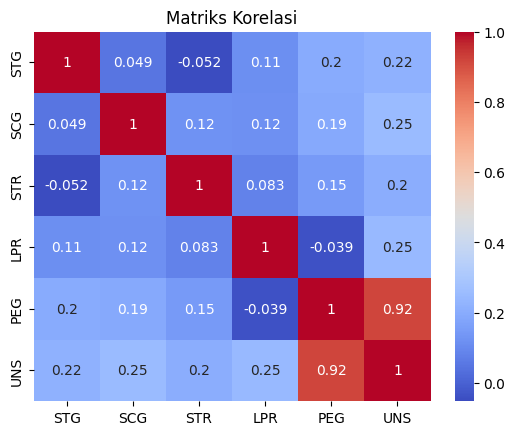

In [6]:
# Mengubah string menjadi int (sementara)
mapping = {
    'very_low': 1,
    'Very Low': 1,
    'Low': 2,
    'Middle': 3,
    'High': 4
}
temp_df = df.copy()
temp_df["UNS"] = temp_df["UNS"].map(mapping)

# Menampilkan korelasi heat map
sns.heatmap(temp_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

### Menampilkan Distribusi / Persebaran Data

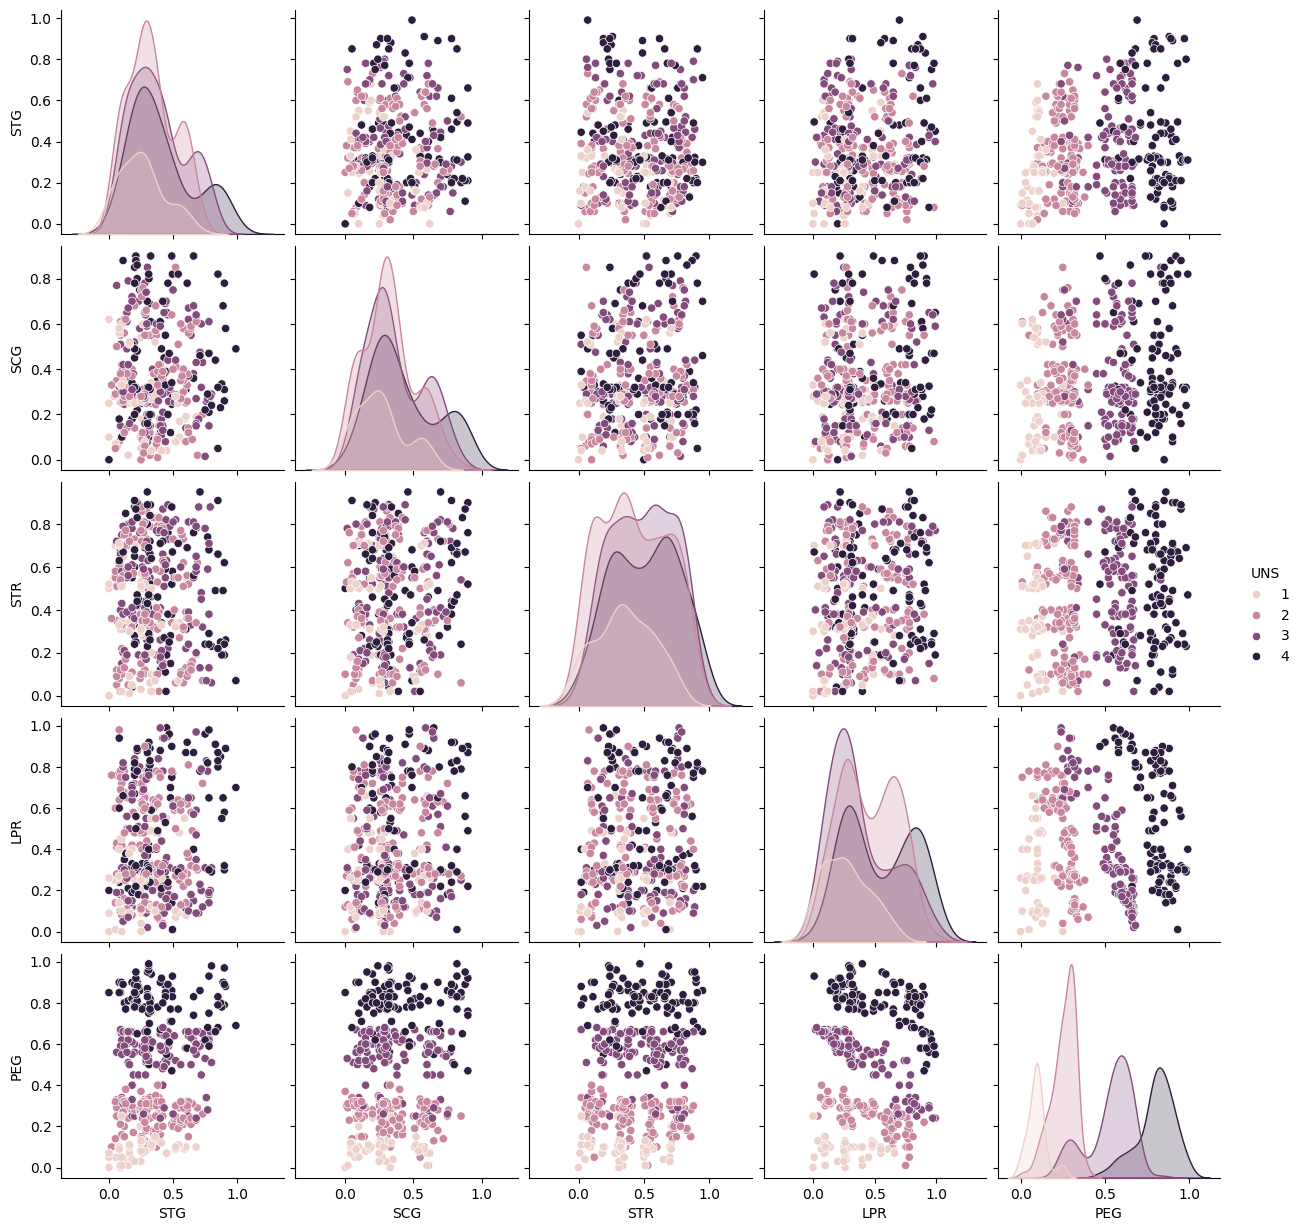

In [7]:
sns.pairplot(temp_df, hue='UNS')
plt.show()

### Menampilkan Histogram Probabilitas Setiap Fitur

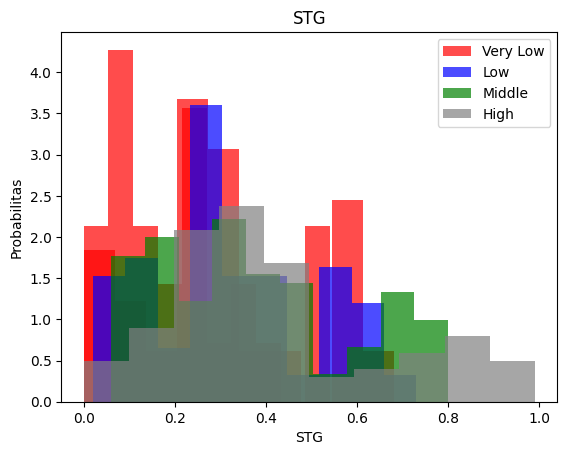

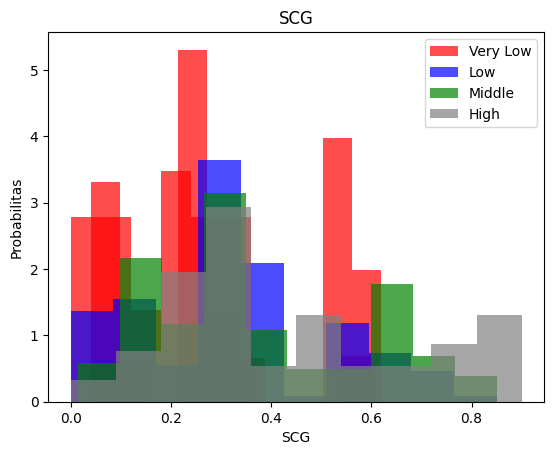

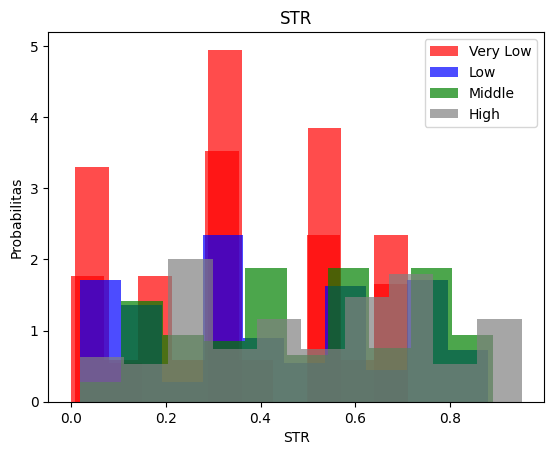

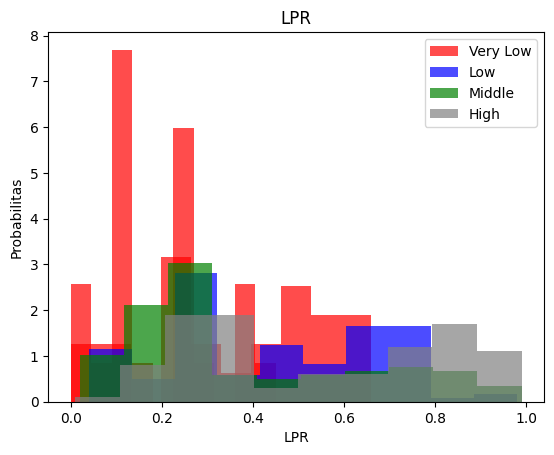

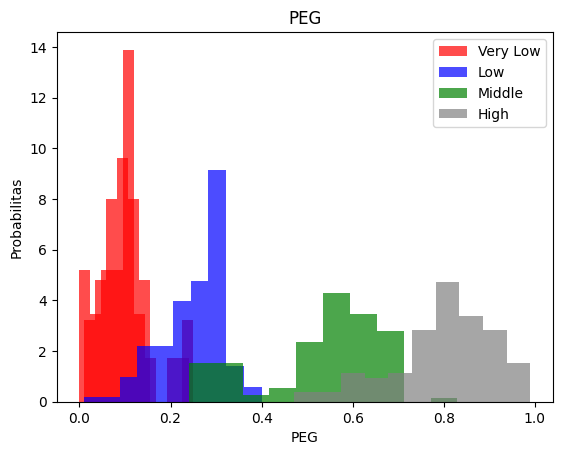

In [8]:
for label in df.columns[:-1]:
    plt.hist(df[df["UNS"] == 'Very Low'][label], color="red", label="Very Low", alpha = 0.7, density=True )
    plt.hist(df[df["UNS"] == 'very_low'][label], color="red", alpha = 0.7, density=True )
    plt.hist(df[df["UNS"] == 'Low'][label], color="blue", label="Low", alpha = 0.7, density=True )
    plt.hist(df[df["UNS"] == 'Middle'][label], color="green", label="Middle", alpha = 0.7, density=True )
    plt.hist(df[df["UNS"] == 'High'][label], color="gray", label="High", alpha = 0.7, density=True )
    plt.title(label)
    plt.ylabel("Probabilitas")
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Data Preprocessing

### Pengecekan Data null atau Bernilai 0 pada Setiap Kolom

In [9]:
# Melihat data bernilai null
df.isnull().sum()

,0
STG,0
SCG,0
STR,0
LPR,0
PEG,0
UNS,0


In [10]:
# Melihat data bernilai 0 pada setiap kolom
df[(df[df.columns[:-1]]==0).all(axis=1)]

,STG,SCG,STR,LPR,PEG,UNS
0,0.0,0.0,0.0,0.0,0.0,very_low


Terdapat 1 sampel data yang bernilai 0 pada setiap kolom sehingga sampel data menjadi tidak relevan.

In [11]:
# Menghapus data bernilai nol
df = df.drop(index=[0])
df = df.reset_index(drop=True)

### Pengecekan Outliers

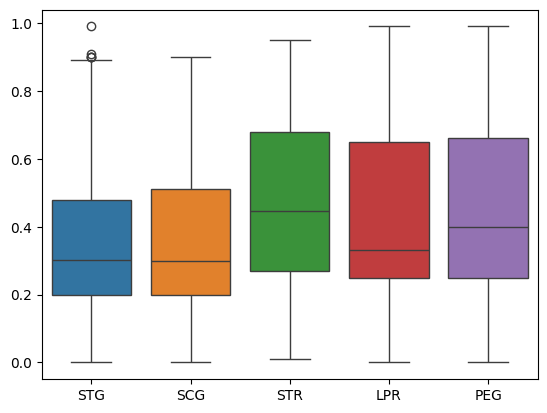

In [12]:
# Melihat persebaran data
sns.boxplot(data=df)
plt.show()

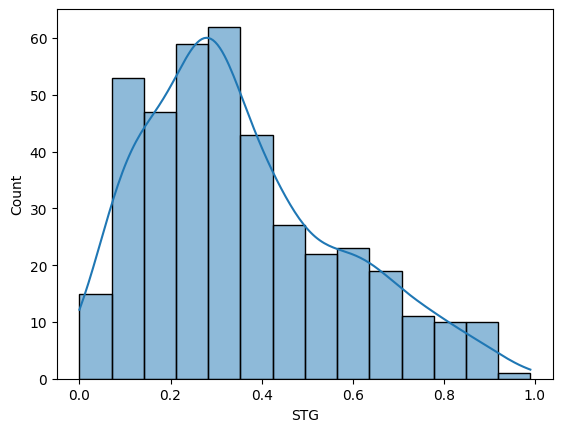

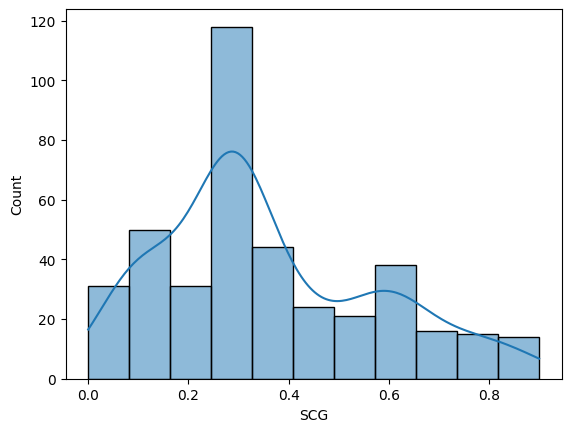

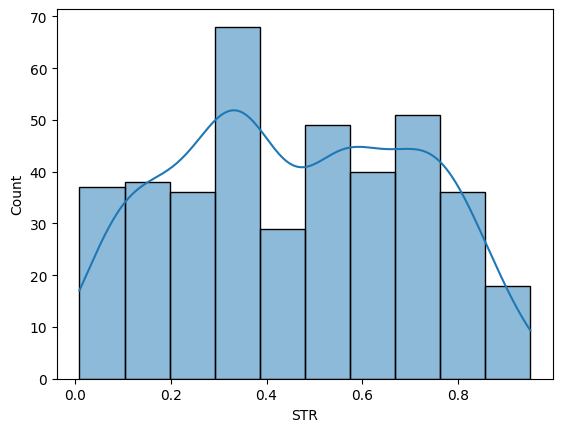

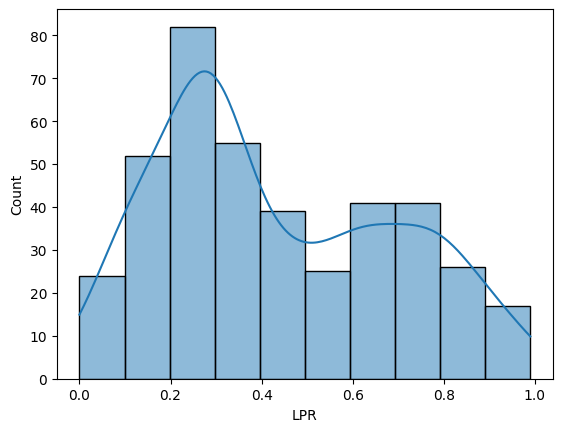

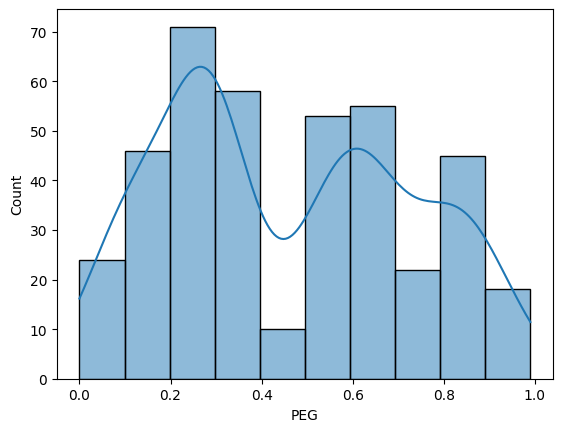

In [13]:
# Melihat skewness data
for label in df.columns[:-1]:
  sns.histplot(df[label], kde=True)
  plt.show()

Terdapat beberapa outlier pada fitur "STG". Outlier teridentifikasi karena kecondongan (positive skewness) yang menyebabkan data menjadi asimetris. Data tidak memerlukan penanganan outlier karena outlier pada data dinilai valid atau relevan.

In [14]:
# Q1 = df[df.columns[:-1]].quantile(0.25)
# Q3 = df[df.columns[:-1]].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# def replace_outliers(column):
#     col_name = column.name
#     column = column.copy()
#     column[column < lower_bound[col_name]] = lower_bound[col_name]
#     column[column > upper_bound[col_name]] = upper_bound[col_name]
#     return column

# df["STG"] = replace_outliers(df["STG"])

### Encoding Pada Data Kategorikal

In [15]:
# Menampilkan nilai-nilai dari data target (kategori)
df["UNS"].unique()

array(['High', 'Low', 'Middle', 'very_low', 'Very Low'], dtype=object)

Data target yang merupakan data kategorikal terdiri dari beberapa nilai sehingga merupakan multiclass classification. Encoding dilakukan dengan ketentuan sebagai berikut.

- Very Low: 1
- Low: 2
- Middle: 3
- High: 4

In [16]:
# Encoding data kategorikal sesuai ketentuan.
mapping = {
    'very_low': 1,
    'Very Low': 1,
    'Low': 2,
    'Middle': 3,
    'High': 4
}

df["UNS"] = df["UNS"].map(mapping)

In [17]:
# Menampilkan data setelah proses encoding
display(df)

,STG,SCG,STR,LPR,PEG,UNS
0,0.08,0.08,0.10,0.24,0.90,4
1,0.06,0.06,0.05,0.25,0.33,2
2,0.10,0.10,0.15,0.65,0.30,3
3,0.08,0.08,0.08,0.98,0.24,2
4,0.09,0.15,0.40,0.10,0.66,3
...,...,...,...,...,...,...
397,0.90,0.78,0.62,0.32,0.89,4
398,0.85,0.82,0.66,0.83,0.83,4
399,0.56,0.60,0.77,0.13,0.32,2
400,0.66,0.68,0.81,0.57,0.57,3


## Mekanisme Pembagian Data Training dan Data Testing

### Pemisahan Data Train dan Test

Pemisahan data dilakukan dengan membagi data menjadi data train sebesar 80% dan data test sebesar 20%.

In [18]:
from sklearn.model_selection import train_test_split

# Memisahkan variabel - variabel fitur (independen)
X = df[df.columns[:-1]].values

# Memisahkan variabel target (dependen)
y = df[df.columns[-1]].values

# Melakukan pembagian data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Menampilkan pembagian data train dan test

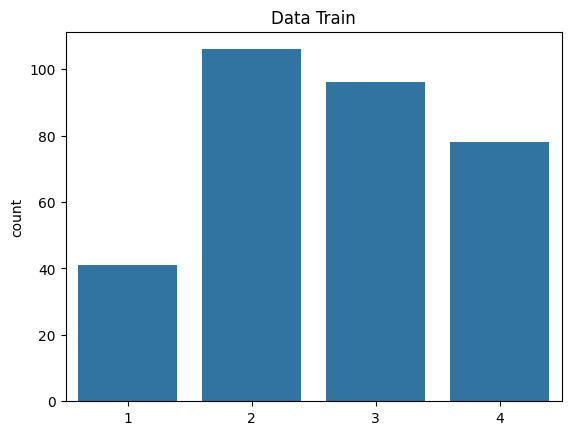

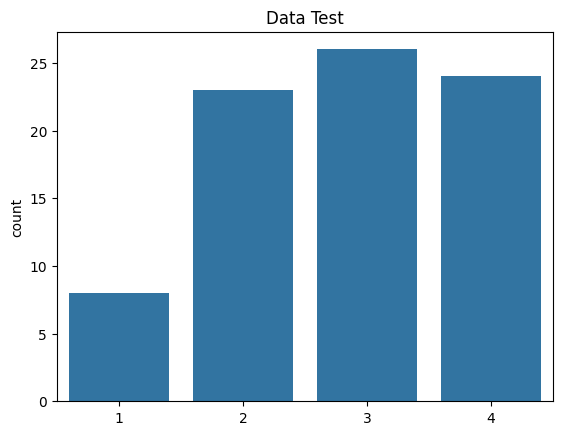

In [19]:
# Menampilkan count plot train
sns.countplot(x=y_train)
plt.title("Data Train")
plt.show()

# Menampilkan count plot test
sns.countplot(x=y_test)
plt.title("Data Test")
plt.show()

### Skala dan Keseimbangan Data

Pada variabel fitur, nilai merupakan derajat penskalaan dari 0 hingga 1. Dengan demikian, tidak memerlukan penskalaan karena tidak terdapat perbedaan nominal yang signifikan diantara nilai-nilai pada setiap fitur.

,count
UNS,
2,129
3,122
4,102
1,49


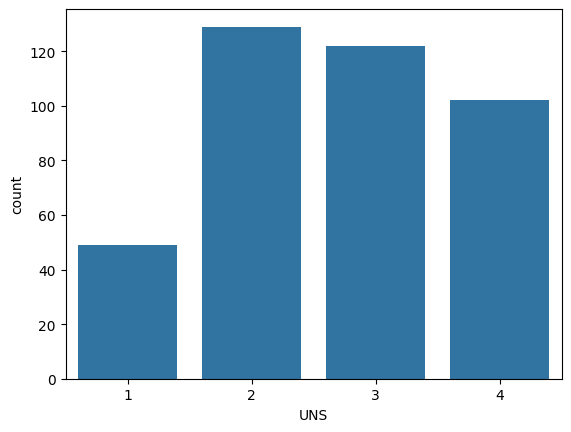

In [20]:
# Menampilkan jumlah dari setiap nilai pada UNS
value_counts = df["UNS"].value_counts()
display(value_counts)

# Menampilkan count plot
sns.countplot(x=df["UNS"])
plt.show()

Terlihat bahwa terdapat ketidak seimbangan kategori / kelas yang menyebabkan adanya kelas minoritas. Untuk menghindari bias ke dalam kelas mayoritas maka diperlukan balancing data atau menyeimbangkan data. Terdapat 2 teknik untuk melakukan oversampling yaitu dengan:
- Random Over Sampler: Duplikasi sampel secara acak dari kelas minoritas.
- SMOTE (Synthetic Minority Oversampling Technique): Membuat data sintetis berdasarkan interpolasi antara sampel kelas minoritas.

In [21]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Membuat fungsi oversampling
def oversample_dataset(X, y, method="RandomOverSampler"):
  if method == "SMOTE":
    oversampler = SMOTE(random_state=42)
  else:
    oversampler = RandomOverSampler(random_state=42)
  X_resampled, y_resampled = oversampler.fit_resample(X, y)
  return X_resampled, y_resampled

In [22]:
# Melakukan oversampling pada X_train dan y_train menggunakan Random Over Sampler
X_resampled, y_resampled = oversample_dataset(X_train, y_train, method="RandomOverSampler")

,count
3,106
4,106
2,106
1,106


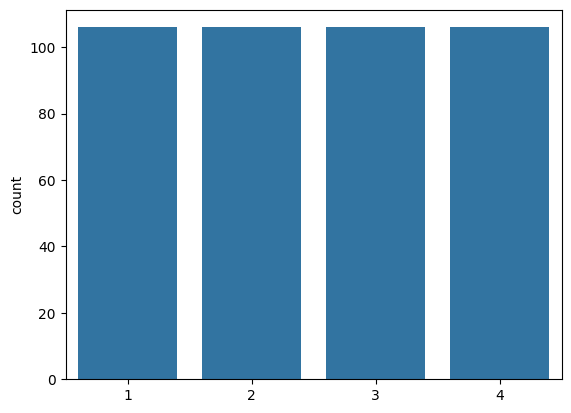

In [23]:
# Menampilkan jumlah setiap nilai pada y_resampled
value_counts = pd.Series(y_resampled).value_counts()
display(value_counts)

# Menampilkan count plot
sns.countplot(x=y_resampled)
plt.show()

In [24]:
X_train = X_resampled
y_train = y_resampled

# B. Metode dan Eksperimen

## Metode

### K-Nearest Neighbors

Metode yang digunakan adalah k-Nearest Neighbors dengan parameter k sebagai jumlah tetangga dan distance sebagai perhitungan jarak.

In [37]:
from collections import Counter
# Membuat class KNearestNeighbors
class KNearestNeighbors:
    def __init__(self, k=3, distance="euclidean"):
        self.k = k
        self.distance = distance
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def calculate_distance(self, x1, x2):
        if self.distance == "manhattan":
            return self.manhattan_distance(x1,x2)
        else:
            return self.euclidean_distance(x1, x2)

    def predict(self, X_test):
        predictions = []
        for X1 in X_test:
            distances = [self.calculate_distance(X1, X2) for X2 in self.X_train]
            k_index = np.argsort(distances)[:self.k]
            k_labels = [self.y_train[index] for index in k_index]
            k_distances = [distances[index] for index in k_index]
            weights = [1 / (dist + 1e-5) for dist in k_distances]
            label_weights = Counter()
            for label, weight in zip(k_labels, weights):
                label_weights[label] += weight
            predictions.append(max(label_weights, key=label_weights.get))
        return np.array(predictions)


## Metriks Evaluasi

### Akurasi

Akurasi adalah rasio antara jumlah prediksi yang benar dengan total prediksi yang dibuat. Ini adalah metrik umum untuk klasifikasi, tetapi dapat menjadi menyesatkan jika dataset tidak seimbang.

$Akurasi = Jumlah Prediksi Yang Benar :  Total Data$

### Presisi

Presisi adalah rasio prediksi positif yang benar (True Positives) terhadap jumlah prediksi yang diklasifikasikan sebagai positif (True Positives + False Positives).

$Presisi = TP : (TP + FP)$

TP = True Positives \\
FP = False Positives

### Recall

Recall mengukur seberapa baik model dapat menemukan semua contoh positif. Ini adalah rasio antara prediksi positif yang benar (True Positives) terhadap jumlah total data positif sebenarnya (True Positives + False Negatives).

$Recall = TP : (TP + FN)$

TP = True Positives \\
FN = False Negatives

### F1-Score

F1-score adalah harmoni antara presisi dan recall. F1-score berguna ketika kita membutuhkan keseimbangan antara presisi dan recall, terutama saat ada ketidakseimbangan kelas.

$F1Score = 2 . (Presisi . Recall :(Presisi + Recall))$

# C. Hasil dan Analisis

## Tahap Training

Pada tahap training, kami melakukan training model berdasarkan beberapa nilai k dan metode perhitungan jarak (distance)

In [38]:
# Model menggunakan euclidean distance

# k = 3
knn_eucl_3 = KNearestNeighbors(k=3)
knn_eucl_3.fit(X_train, y_train)

# k = 5
knn_eucl_5 = KNearestNeighbors(k=5)
knn_eucl_5.fit(X_train, y_train)

# k = 7
knn_eucl_7 = KNearestNeighbors(k=3)
knn_eucl_7.fit(X_train, y_train)

In [39]:
# Model menggunakan manhattan distance

# k = 3
knn_manhat_3 = KNearestNeighbors(k=3, distance="manhattan")
knn_manhat_3.fit(X_train, y_train)

# k = 5
knn_manhat_5 = KNearestNeighbors(k=5, distance="manhattan")
knn_manhat_5.fit(X_train, y_train)

# k = 7
knn_manhat_7 = KNearestNeighbors(k=3, distance="manhattan")
knn_manhat_7.fit(X_train, y_train)

## Tahap Testing

Menggunakan **Euclidean**

In [40]:
from sklearn.metrics import classification_report

# Melakukan test pada knn_eucl_3
y_pred = knn_eucl_3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.85      0.96      0.90        23
           3       0.88      0.88      0.88        26
           4       1.00      0.92      0.96        24

    accuracy                           0.91        81
   macro avg       0.93      0.91      0.92        81
weighted avg       0.92      0.91      0.91        81



In [41]:
# Melakukan test pada knn_eucl_5
y_pred = knn_eucl_5.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.83      0.87      0.85        23
           3       0.79      0.88      0.84        26
           4       1.00      0.88      0.93        24

    accuracy                           0.88        81
   macro avg       0.91      0.88      0.89        81
weighted avg       0.89      0.88      0.88        81



In [42]:
# Melakukan test pada knn_eucl_7
y_pred = knn_eucl_7.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.85      0.96      0.90        23
           3       0.88      0.88      0.88        26
           4       1.00      0.92      0.96        24

    accuracy                           0.91        81
   macro avg       0.93      0.91      0.92        81
weighted avg       0.92      0.91      0.91        81



Menggunakan **Manhattan**

In [43]:
# Melakukan test pada knn_manhat_3
y_pred = knn_manhat_3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       0.87      0.87      0.87        23
           3       0.85      0.85      0.85        26
           4       0.96      0.92      0.94        24

    accuracy                           0.89        81
   macro avg       0.89      0.91      0.90        81
weighted avg       0.89      0.89      0.89        81



In [44]:
# Melakukan test pada knn_manhat_5
y_pred = knn_manhat_5.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.84      0.91      0.88        23
           3       0.88      0.88      0.88        26
           4       1.00      0.92      0.96        24

    accuracy                           0.90        81
   macro avg       0.90      0.90      0.90        81
weighted avg       0.91      0.90      0.90        81



In [45]:
# Melakukan test pada knn_manhat_7
y_pred = knn_manhat_7.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       0.87      0.87      0.87        23
           3       0.85      0.85      0.85        26
           4       0.96      0.92      0.94        24

    accuracy                           0.89        81
   macro avg       0.89      0.91      0.90        81
weighted avg       0.89      0.89      0.89        81



## K-Fold Cross Validation

K-Fold Cross Validation memastikan bahwa model diuji secara menyeluruh pada seluruh data. K-Fold Cross Validation membagi dataset menjadi beberapa subset untuk melatih dan menguji model pada data yang berbeda. Langkah implementasinya sebagai berikut.
- Dataset dibagi menjadi k subset.
- Model dilatih pada k-1 subset dan diuji pada fold yang tersisa.
- Proses diulang hingga mencapai semua kombinasi.

K-Fold Cross Validation dapat membantu untuk mereduksi overfitting. Tanpa K-Fold, model seringkali bias terhadap data yang digunakan pada training dan testing.

In [46]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Membuat class KFoldCrossValidation
class KFoldCrossValidation:
    def __init__(self, k=5, model=KNearestNeighbors(k=3, distance="euclidean")):
        self.k = k
        self.model = model
        self.kf = KFold(n_splits=k, shuffle=True, random_state=42)

    def fit(self, X, y):
      scores = []
      for train_index, test_index in self.kf.split(X):
          X_resampled, X_test = X[train_index], X[test_index]
          y_resampled, y_test = y[train_index], y[test_index]

          self.model.fit(X_train, y_train)
          predictions = self.model.predict(X_test)
          score = accuracy_score(y_test, predictions)
          scores.append(score)
      return scores, np.mean(scores)

Kami melakukan pengujian K-Fold Cross Validation dengan pembagian dataset menjadi 5 subset dan Model K-Nearest Neighbors dengan k = 3 dan perhitungan jarak (distance) euclidean.

In [47]:
# Oversampling data X, y
X_resampled2, y_resampled2 = oversample_dataset(X, y, method="RandomOverSampler")

# Melakukan K-Fold Cross Validation
kfold = KFoldCrossValidation(k=5, model=KNearestNeighbors(k=3, distance="euclidean"))
scores, mean = kfold.fit(X_resampled2, y_resampled2)

# Menampilkan skor
print("Akurasi per fold", scores)
print("Akurasi rata-rata:", mean)

Akurasi per fold [0.9711538461538461, 0.970873786407767, 0.9902912621359223, 1.0, 0.9902912621359223]
Akurasi rata-rata: 0.9845220313666916


Hasil yang diperoleh mendapatkan rata-rata skor akurasi yang cukup tinggi yaitu mencapai 98%. Dari perolehan tersebut kinerja model sudah cukup baik dalam melakukan prediksi klasifikasi.

# D. Kesimpulan

Berdasarkan percobaan yang dilakukan dengan menggunakan algoritma K-Nearest Neighbors (k-NN), model menunjukkan kinerja yang sangat baik dalam memprediksi status pengetahuan siswa pada dataset. Di antara dua opsi perhitungan jarak (distance), euclidean memiliki akurasi sedikit lebih tinggi dibandingkan dengan manhattan. Model dengan k (jumlah tetangga) yang diambil sama dengan tiga atau tujuh dan menggunakan euclidean dapat menghasilkan akurasi tertinggi mencapai 0.91 atau 91%.